In [9]:
#라이브러리 및 모듈 불러오기
import warnings
warnings.filterwarnings("ignore")

print("완료!")

완료!


In [10]:
# 텐서플로우 버젼 확인
import tensorflow as tf
print(tf.__version__)

2.6.0


In [11]:
import tensorflow_datasets as tfds

tfds.__version__

'4.4.0'

In [12]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name='tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    download=True,
    with_info=True,
    as_supervised=True,
)

In [13]:

print(len(raw_train))
print(len(raw_validation))
print(len(raw_test))

2936
367
367


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print("슝~")

슝~


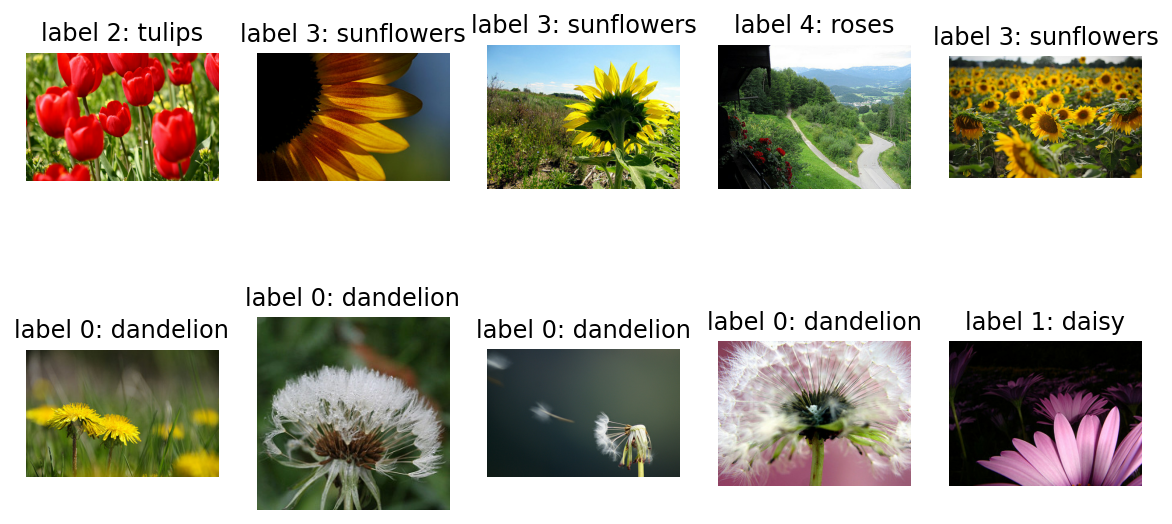

In [15]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [16]:
# 이미지 수정
IMG_SIZE = 160 # 리사이징할 이미지의 크기

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1 # 픽셀값의 scale 수정
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

print("슝~")

슝~


In [17]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

print(train)
print(validation)
print(test)

<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>


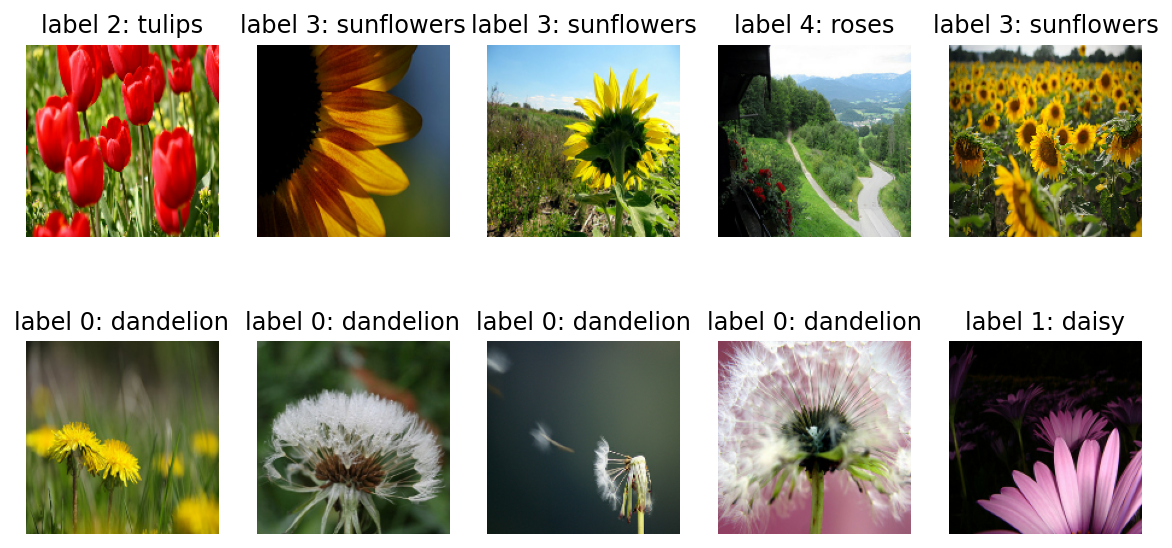

In [18]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

print("슝~")

슝~


In [20]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=5, activation='softmax')
])

print("슝~")

슝~


In [22]:
# 모델 서머리
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

In [23]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

print("슝~")

슝~


In [24]:
BATCH_SIZE = 20
SHUFFLE_BUFFER_SIZE = 1000
print("슝~")

슝~


In [25]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)
print("슝~")

슝~


In [26]:
for image_batch, label_batch in train_batches.take(1):
    break

image_batch.shape, label_batch.shape

(TensorShape([20, 160, 160, 3]), TensorShape([20]))

In [27]:
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

19/20 [===========================>..] - ETA: 0s - loss: 1.6169 - accuracy: 0.2016WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 20 batches). You may need to use the repeat() function when building your dataset.


20/20 [==============================] - 36s 52ms/step - loss: 1.6169 - accuracy: 0.2016
initial loss: 1.62
initial accuracy: 0.20


In [28]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
147/147 [==============================] - 10s 28ms/step - loss: 1.3764 - accuracy: 0.4247 - val_loss: 1.1321 - val_accuracy: 0.5395
Epoch 2/10
147/147 [==============================] - 3s 20ms/step - loss: 1.0590 - accuracy: 0.5688 - val_loss: 1.0073 - val_accuracy: 0.5913
Epoch 3/10
147/147 [==============================] - 3s 20ms/step - loss: 0.8954 - accuracy: 0.6478 - val_loss: 1.0094 - val_accuracy: 0.5886
Epoch 4/10
147/147 [==============================] - 3s 20ms/step - loss: 0.7667 - accuracy: 0.7207 - val_loss: 0.9050 - val_accuracy: 0.6485
Epoch 5/10
147/147 [==============================] - 3s 20ms/step - loss: 0.6367 - accuracy: 0.7704 - val_loss: 0.9400 - val_accuracy: 0.6403
Epoch 6/10
147/147 [==============================] - 3s 20ms/step - loss: 0.5318 - accuracy: 0.8188 - val_loss: 0.9383 - val_accuracy: 0.6431
Epoch 7/10
147/147 [==============================] - 3s 20ms/step - loss: 0.4279 - accuracy: 0.8631 - val_loss: 0.9182 - val_accuracy: 0.664

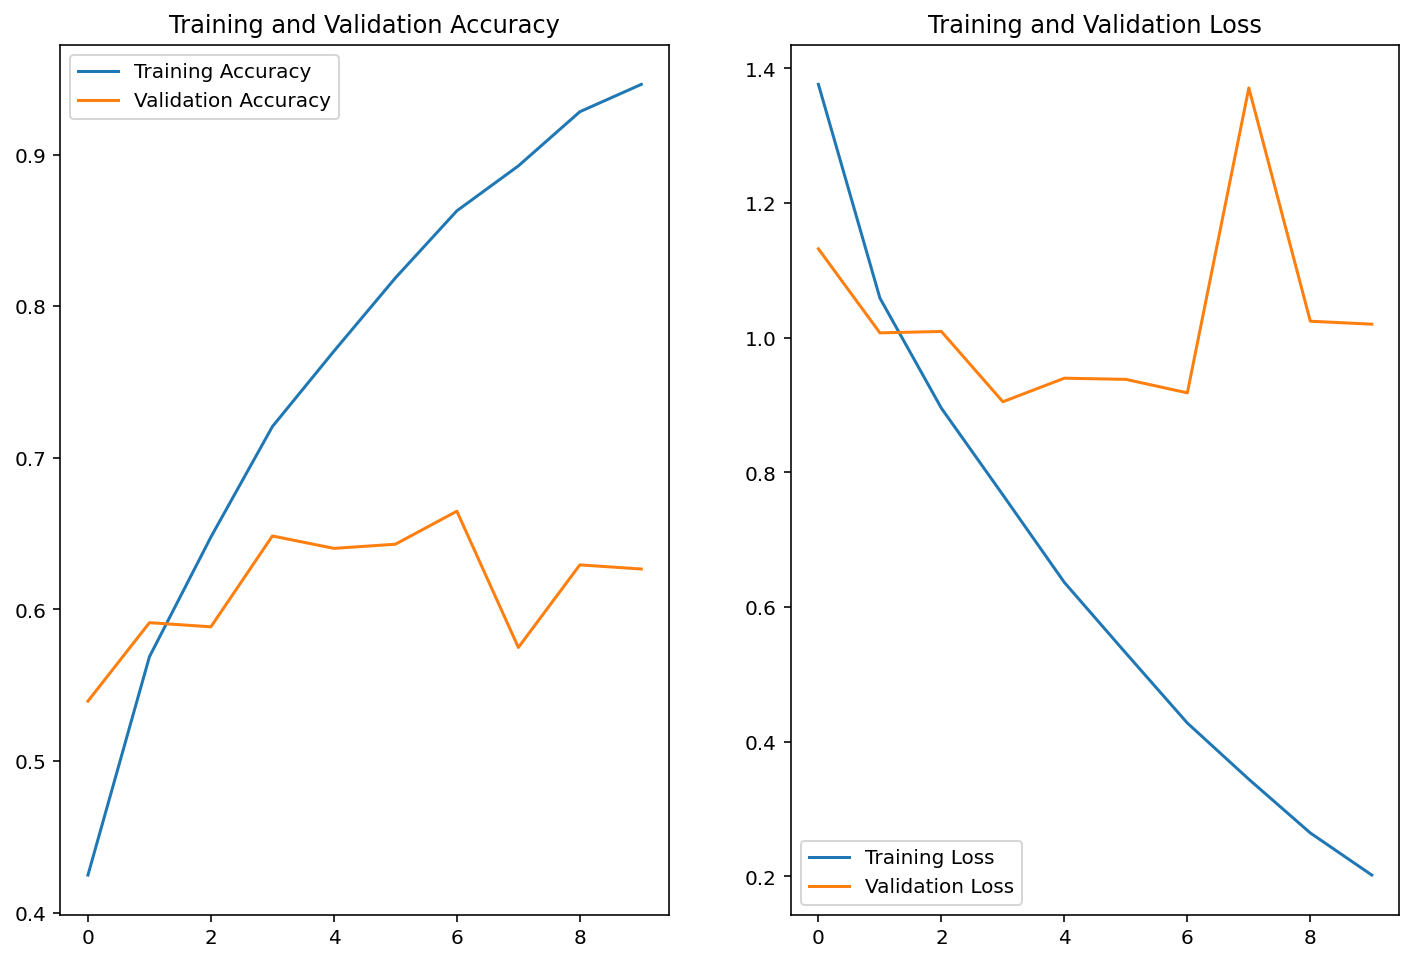

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [30]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    break

predictions

array([[1.99990231e-03, 6.74276089e-04, 7.43583441e-01, 7.83571973e-02,
        1.75385192e-01],
       [9.86911535e-01, 1.28921587e-02, 5.73607467e-05, 1.94000492e-07,
        1.38690695e-04],
       [3.80811155e-01, 7.48848096e-02, 2.31269613e-01, 3.10672283e-01,
        2.36210995e-03],
       [6.44740164e-02, 8.56238604e-02, 5.34930348e-01, 1.55416233e-02,
        2.99430102e-01],
       [6.96103513e-01, 5.83786294e-02, 1.60581097e-02, 2.18005665e-02,
        2.07659081e-01],
       [1.22319944e-01, 1.08678732e-02, 4.47849836e-03, 1.39440491e-03,
        8.60939264e-01],
       [9.18997824e-03, 2.96311378e-01, 6.24745071e-01, 4.61157709e-02,
        2.36377511e-02],
       [1.77329153e-01, 6.95437938e-02, 1.02664739e-01, 5.43357208e-02,
        5.96126616e-01],
       [5.85570838e-03, 2.34964409e-05, 7.87631026e-04, 9.93323028e-01,
        1.00516172e-05],
       [9.95633304e-01, 3.76860215e-03, 1.02336544e-05, 2.92523907e-07,
        5.87517221e-04],
       [9.54222918e-01, 7.5543

In [31]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

array([2, 0, 0, 2, 0, 4, 2, 4, 3, 0, 0, 3, 2, 4, 4, 3, 2, 0, 1, 4])

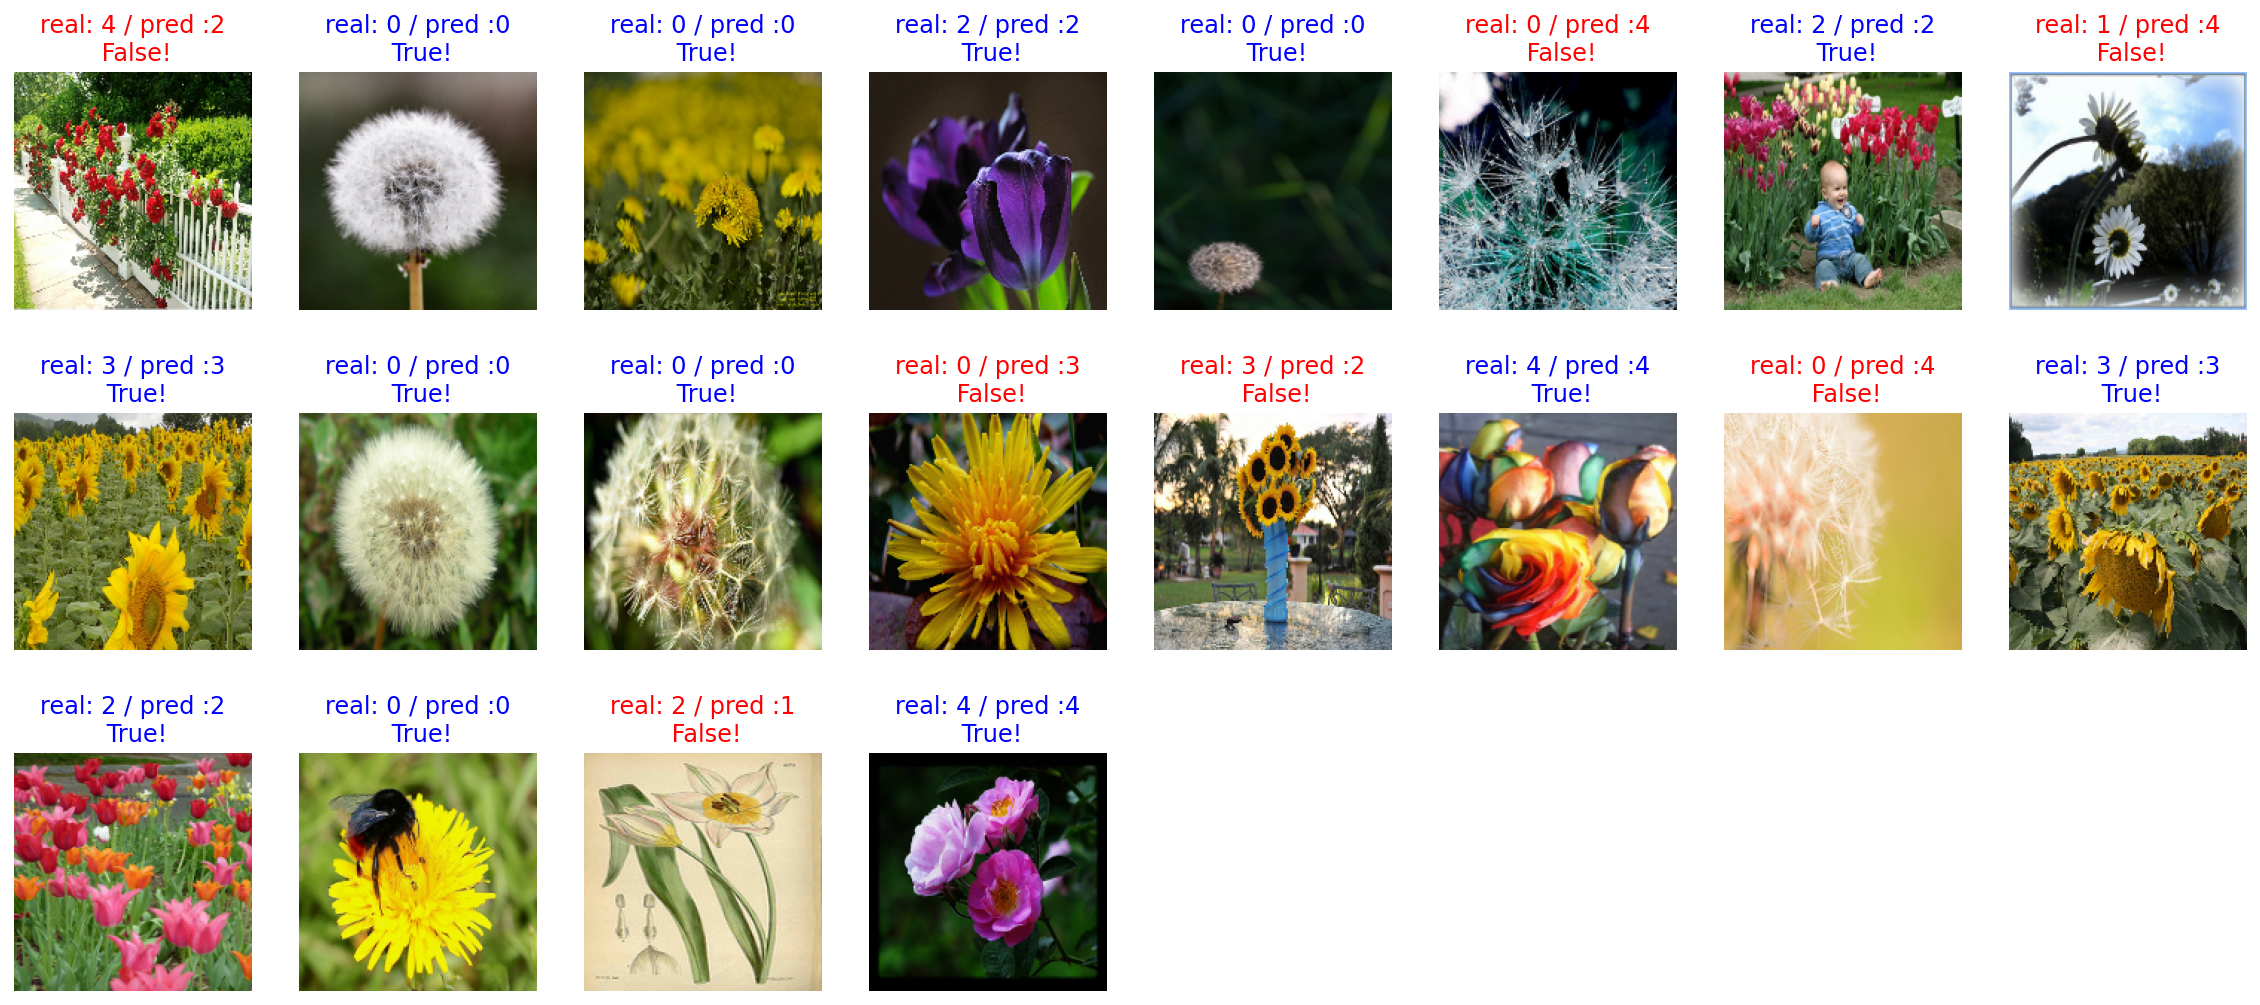

In [32]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [33]:
# 정답을 맞춘 개수
count = 0 
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct == True:
        count += 1

print(count / 20 * 100)

65.0


In [34]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.ResNet50V2(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

94683136/94668760 [==============================] - 1s 0us/step


In [35]:
image_batch.shape

TensorShape([20, 160, 160, 3])

In [36]:
feature_batch = base_model(image_batch)
feature_batch.shape

TensorShape([20, 5, 5, 2048])

In [37]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 82, 82, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [38]:
feature_batch.shape

TensorShape([20, 5, 5, 2048])

In [39]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
print("슝~")

슝~


In [40]:
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(20, 2048)


In [41]:
# Dense layer에는 unit과 activation 2개의 매개변수만 사용해주세요.
# unit의 값은 위에서 global_average_layer를 통과했을 때의 값을 생각해보세요.
# 활성화 함수는 ReLU를 사용합니다.
dense_layer = tf.keras.layers.Dense(1024, activation='relu')
# unit은 우리가 분류하고 싶은 class를 생각해보세요.
# 활성화 함수는 Softmax를 사용합니다.
prediction_layer = tf.keras.layers.Dense(5, activation='softmax')

# feature_batch_averag가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)

(20, 5)


In [42]:
base_model.trainable = False # True
print("슝~")

슝~


In [43]:
'''
fine_tune_at = 140
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
    
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)
'''

'\nfine_tune_at = 140\nfor layer in base_model.layers[:fine_tune_at]:\n    layer.trainable = False\n    \nfor i, layer in enumerate(base_model.layers):\n  print(i, layer.name, layer.trainable)\n'

In [44]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])
print("슝~")

슝~


In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 5, 5, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 5125      
Total params: 25,668,101
Trainable params: 2,103,301
Non-trainable params: 23,564,800
_________________________________________________________________


In [46]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [47]:
validation_steps=10
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

10/10 [==============================] - 2s 33ms/step - loss: 2.2312 - accuracy: 0.2100
initial loss: 2.23
initial accuracy: 0.21


In [48]:
def apply_augmentation(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)

    return image, label

In [49]:
train_batches = train_batches.map(apply_augmentation)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

In [51]:
def learning_rate_scheduler(epoch, learning_rate):
    if epoch%5 == 0:
        return learning_rate * 0.5
    else:
        return learning_rate

In [52]:
lr_scheduler_callback = LearningRateScheduler(learning_rate_scheduler)

In [53]:
EPOCHS = 10   # 이번에는 이전보다 훨씬 빠르게 수렴되므로 5Epoch이면 충분합니다.
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches,
                    callbacks=[early_stopping_callback, lr_scheduler_callback])

Epoch 1/10
147/147 [==============================] - 12s 64ms/step - loss: 0.8833 - accuracy: 0.6642 - val_loss: 0.5284 - val_accuracy: 0.7956
Epoch 2/10
147/147 [==============================] - 9s 57ms/step - loss: 0.5224 - accuracy: 0.8110 - val_loss: 0.4348 - val_accuracy: 0.8447
Epoch 3/10
147/147 [==============================] - 9s 56ms/step - loss: 0.4262 - accuracy: 0.8478 - val_loss: 0.4092 - val_accuracy: 0.8556
Epoch 4/10
147/147 [==============================] - 9s 56ms/step - loss: 0.3667 - accuracy: 0.8719 - val_loss: 0.3836 - val_accuracy: 0.8529
Epoch 5/10
147/147 [==============================] - 9s 59ms/step - loss: 0.3421 - accuracy: 0.8828 - val_loss: 0.3785 - val_accuracy: 0.8583
Epoch 6/10
147/147 [==============================] - 9s 56ms/step - loss: 0.3095 - accuracy: 0.8896 - val_loss: 0.3795 - val_accuracy: 0.8638
Epoch 7/10
147/147 [==============================] - 9s 57ms/step - loss: 0.2915 - accuracy: 0.9002 - val_loss: 0.3713 - val_accuracy: 0.861

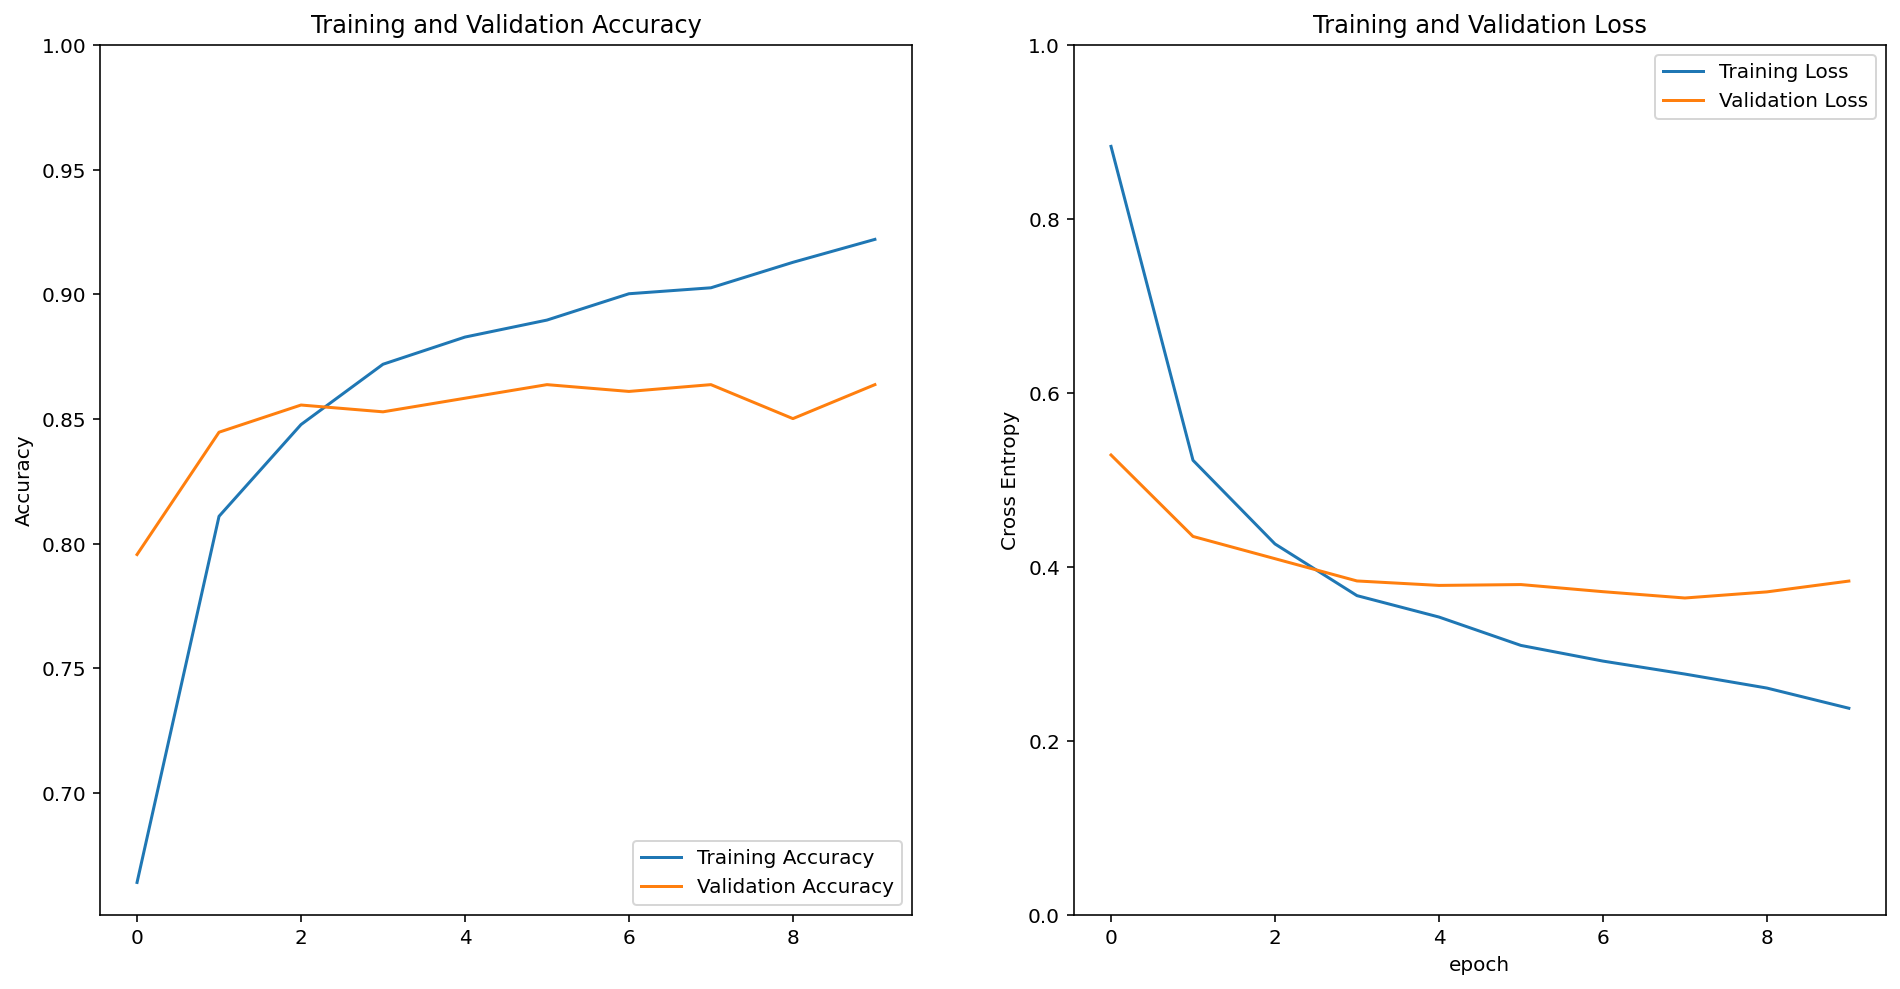

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [55]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

array([[2.59631407e-02, 4.57648300e-02, 7.58272767e-01, 7.22547844e-02,
        9.77445170e-02],
       [9.99995470e-01, 3.80059782e-06, 4.51046219e-07, 4.09397494e-08,
        2.01411439e-07],
       [7.97924280e-01, 6.00124570e-03, 2.63851508e-02, 1.65227234e-01,
        4.46220161e-03],
       [4.26695123e-03, 1.14471167e-01, 8.01879764e-01, 3.01746244e-04,
        7.90802613e-02],
       [9.97849345e-01, 1.67305954e-03, 1.43012876e-04, 6.79938239e-05,
        2.66630115e-04],
       [9.92991567e-01, 6.40655030e-03, 1.40862001e-04, 3.84074170e-04,
        7.69503677e-05],
       [4.87405527e-03, 4.11730772e-03, 7.08349705e-01, 2.77798116e-01,
        4.86084726e-03],
       [5.19627392e-01, 1.66055381e-01, 2.22297913e-05, 3.12370330e-01,
        1.92463107e-03],
       [1.11422362e-02, 2.44204490e-03, 2.65318360e-02, 9.49304163e-01,
        1.05796596e-02],
       [9.99211550e-01, 6.34406460e-04, 2.42099941e-05, 3.93614719e-05,
        9.03832188e-05],
       [9.97549593e-01, 1.0394

In [56]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

array([2, 0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 3, 4, 0, 3, 2, 0, 2, 4])

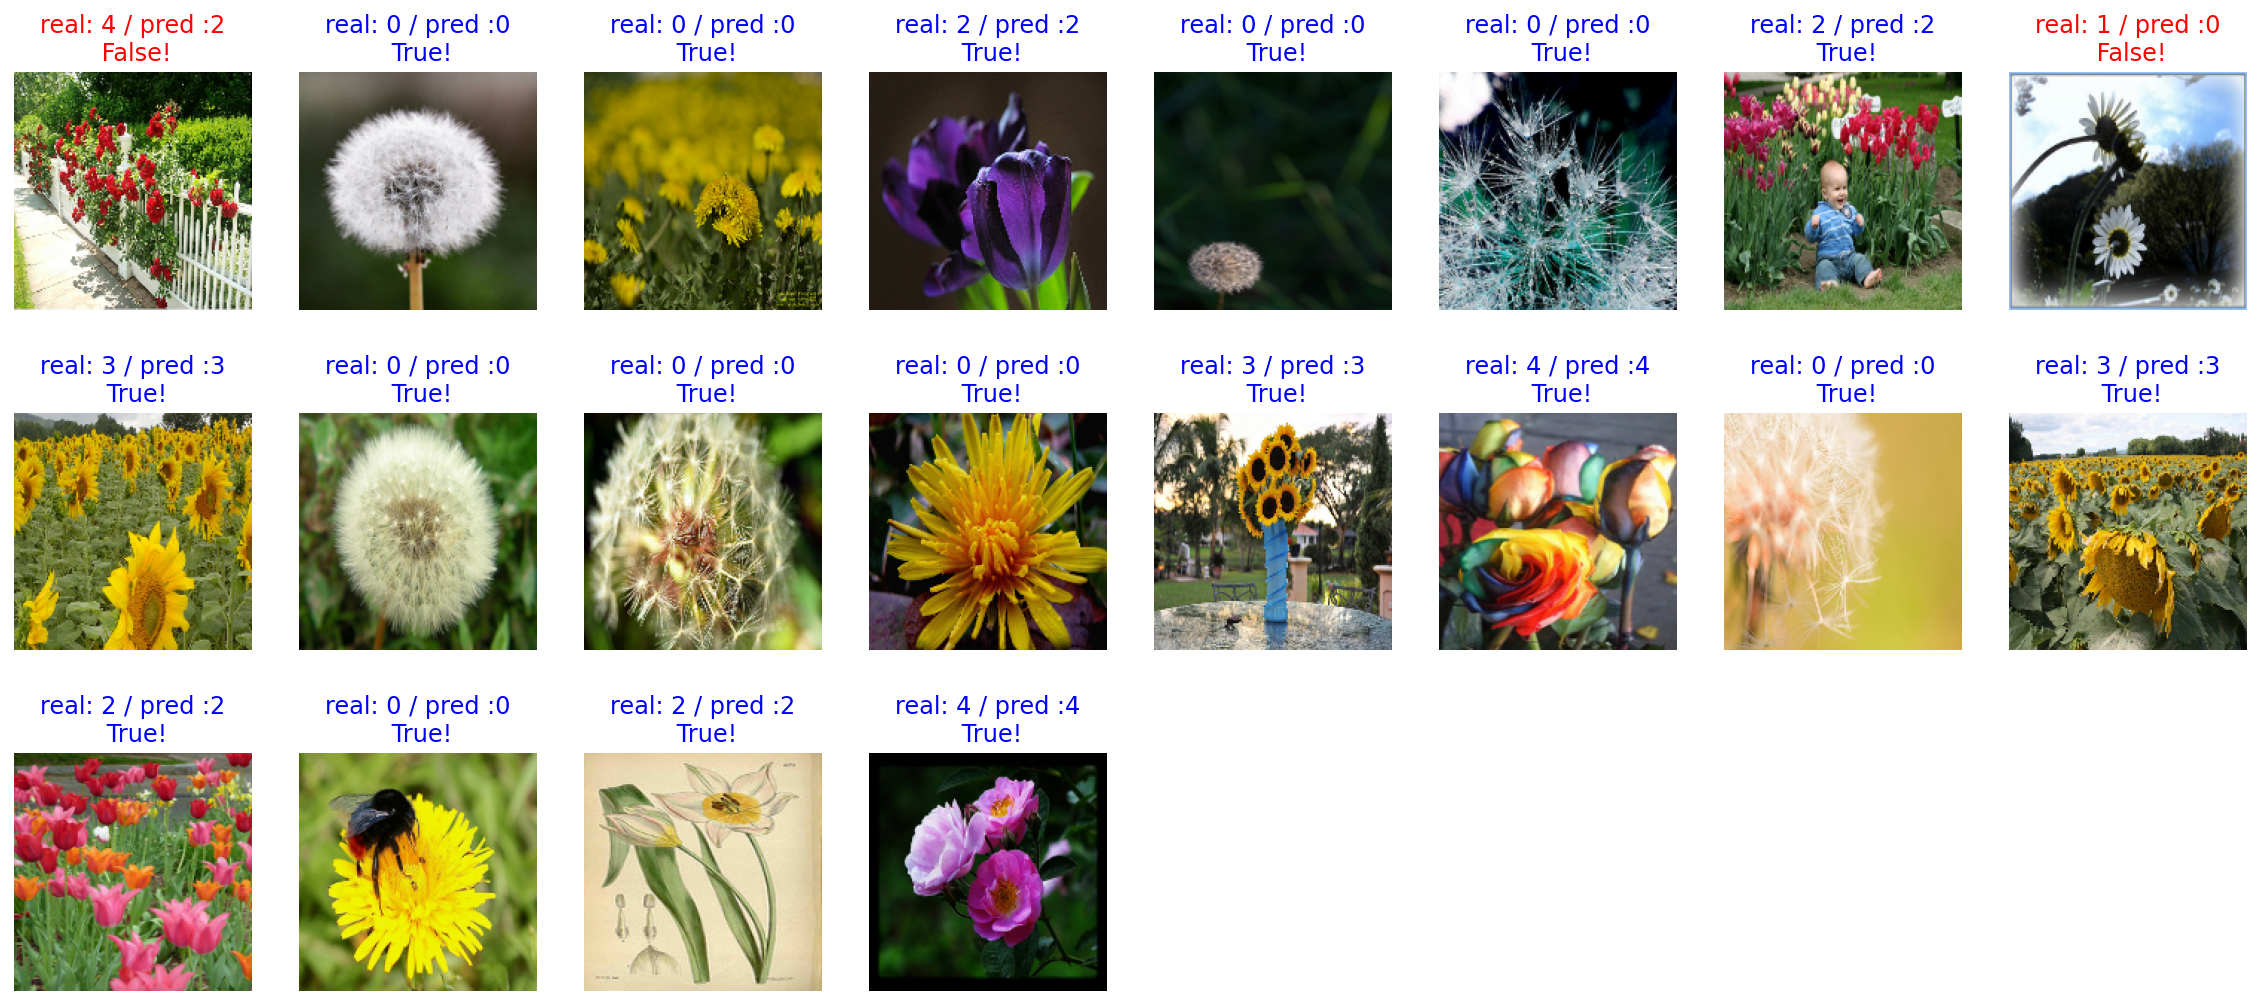

In [57]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [58]:
count = 0
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 20 * 100)

90.0


In [59]:
test_loss, test_accuracy = model.evaluate(test_batches)

19/19 [==============================] - 1s 43ms/step - loss: 0.3736 - accuracy: 0.8828


In [ ]:
# 회고 

1. 어려운 점 = 아직 코딩이 너무 어렵게 다가옵니다...
2. 개념들과 구성들은 하나 씩 이해가 되어가고 있는 과정은 너무 즐겁습니다.
3. 모르는 것들은 그루분들에게 배우면서 헤쳐나가고 있지만 속도가 좀 버거움을 느끼는 속도이긴 한 듯 합니다.